In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train=pd.read_csv('train (2).csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Checking null values and droping null values
train.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
#Getting Dummies for the object type
for i in train.columns:
  if(train[i].dtypes==object):
    train=pd.get_dummies(train,columns=[i])

In [6]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


### Finding correlation of Sale Price with other variables and keeping only those who have a stronger positive or neagtive correlation
#### we are keeping only those variables which have correlation values above 0.5 or below -0.5

In [7]:
data=pd.DataFrame()
for i in train.columns:
  temp=train['SalePrice'].corr(train[i])
  if(temp>=0.5):
    data[i]=train[i]
  if(temp<=-0.5):
    data[i]=train[i]

In [8]:
data

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA
0,7,2003,2003,856,856,1710,2,8,2,548,208500,0,0,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,1,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,223500,0,0,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,140000,1,0,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,1,0,0,1
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,1,0,0,1
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,0,0,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,1,0,0,0


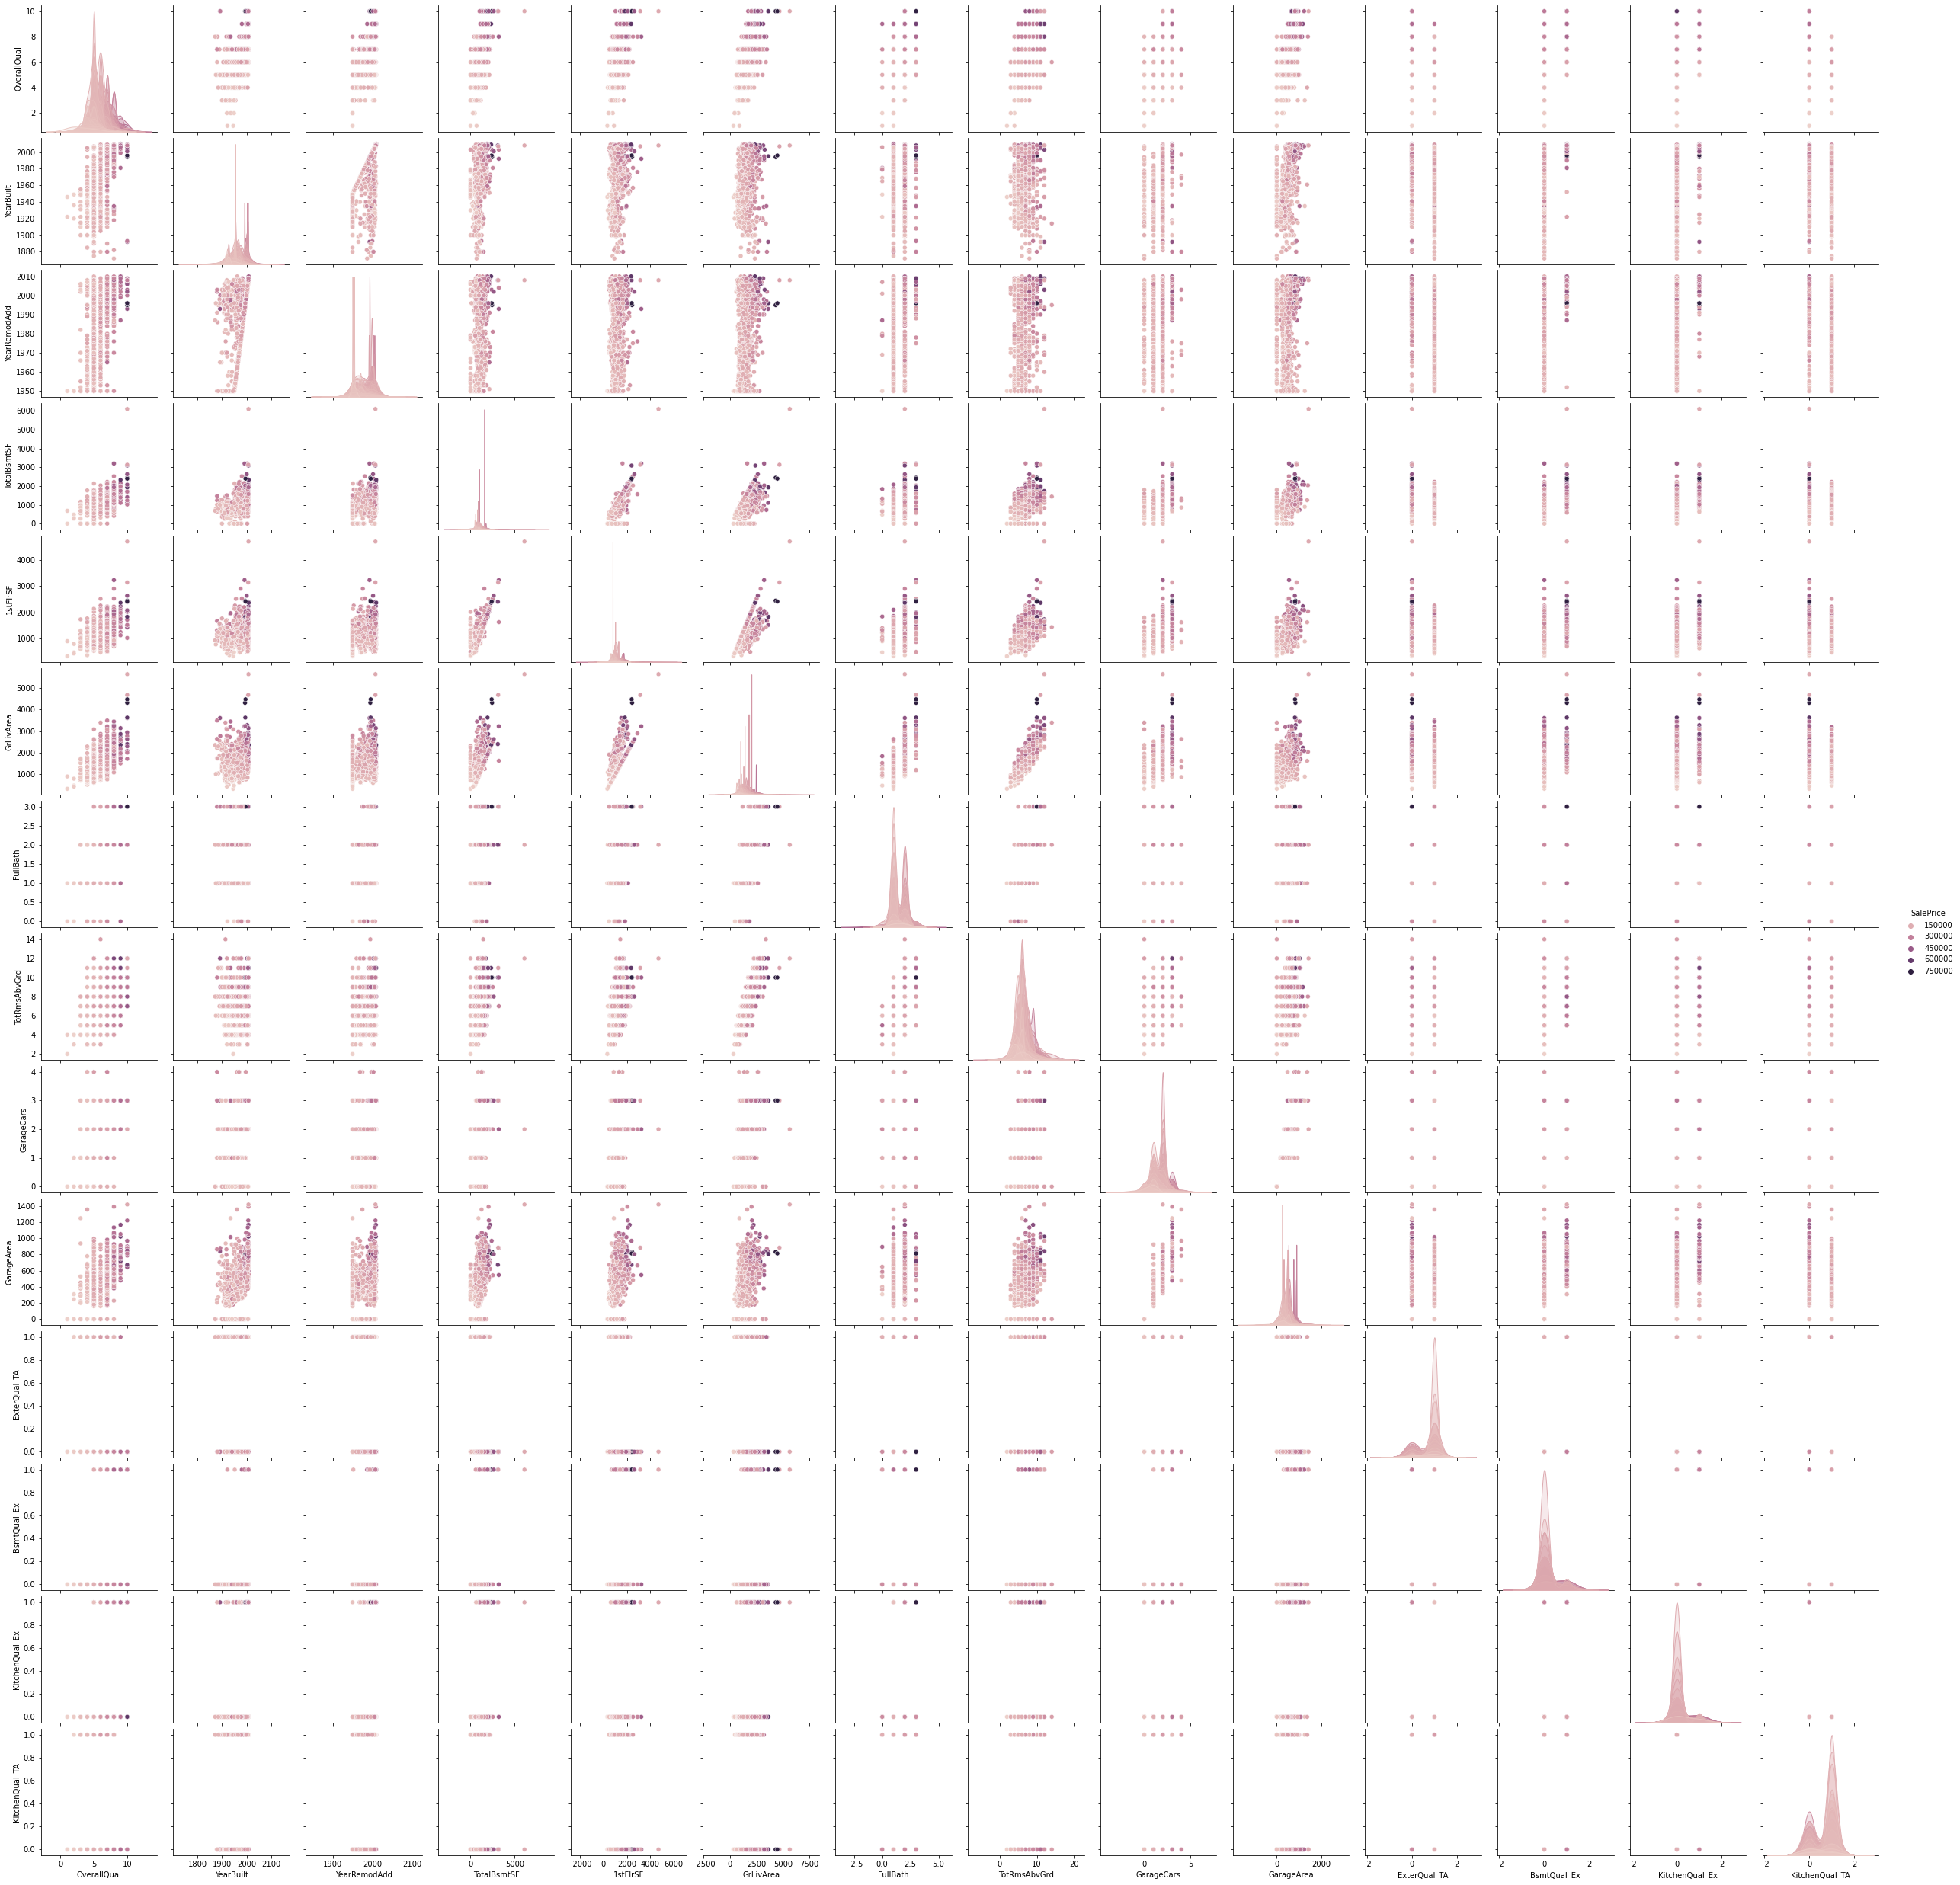

In [9]:
 sns.pairplot(data,hue='SalePrice')

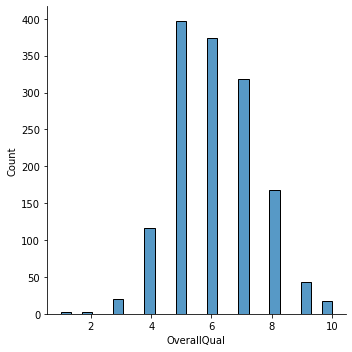

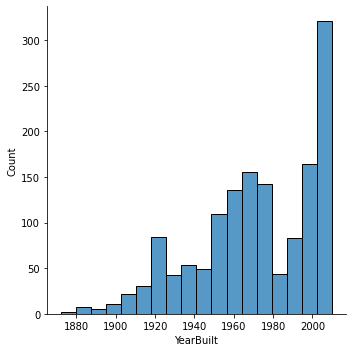

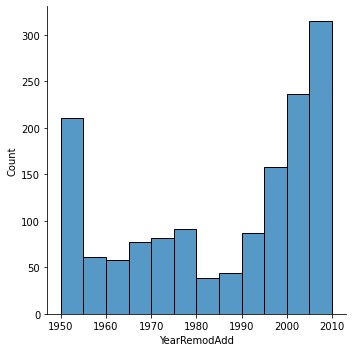

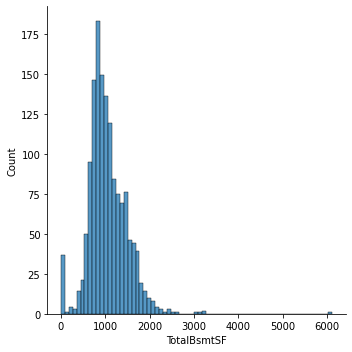

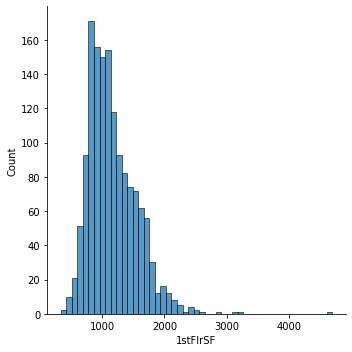

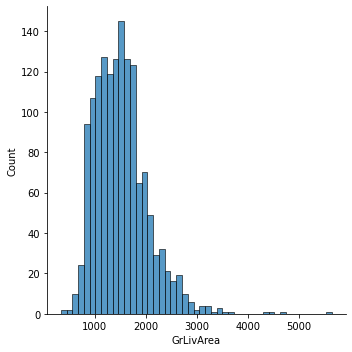

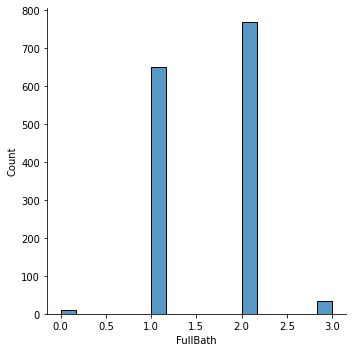

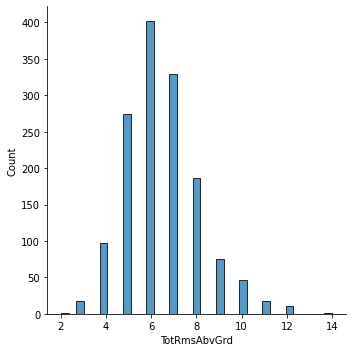

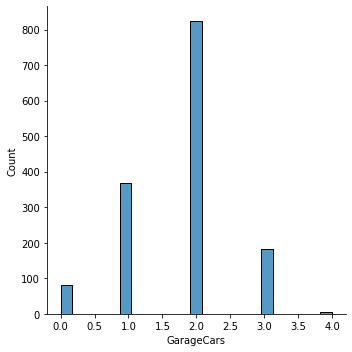

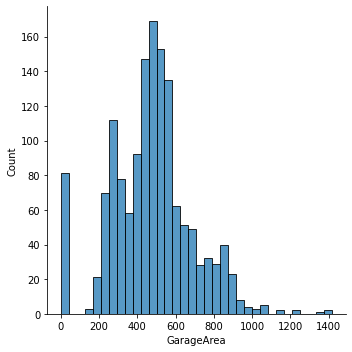

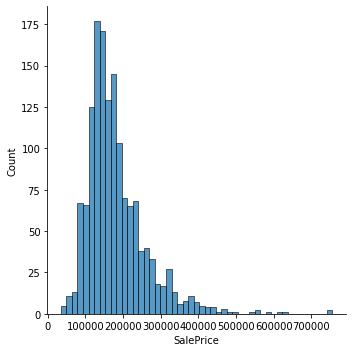

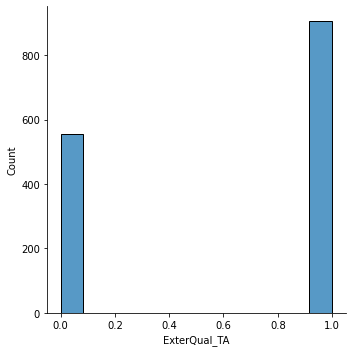

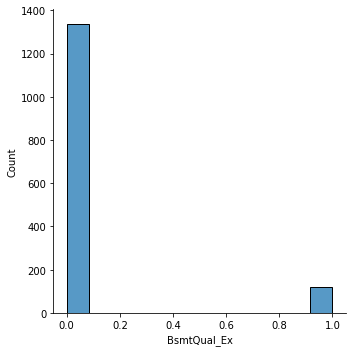

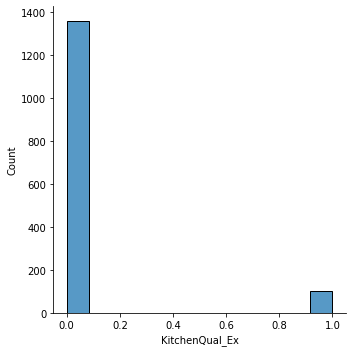

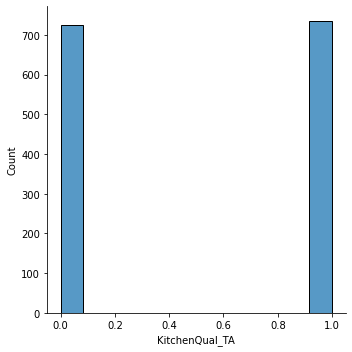

In [10]:
for i in data.columns:
    sns.displot(data[i])

<Axes: xlabel='YearBuilt', ylabel='YearRemodAdd'>

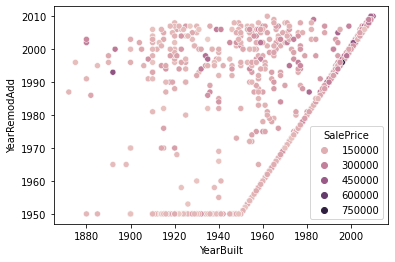

In [11]:
sns.scatterplot(data=data,x='YearBuilt',y='YearRemodAdd',hue='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='GarageArea'>

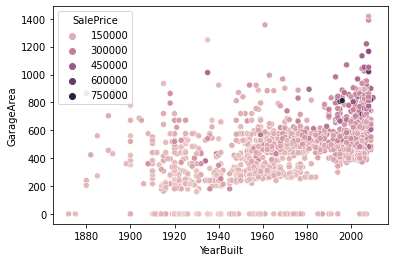

In [12]:
sns.scatterplot(data=data,x='YearBuilt',y='GarageArea',hue='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

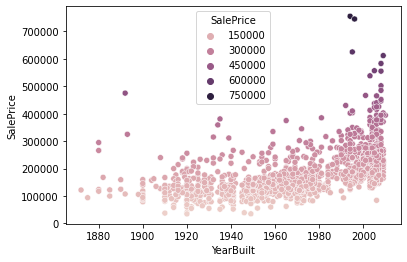

In [13]:
sns.scatterplot(data=data,x='YearBuilt',y='SalePrice',hue='SalePrice')

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

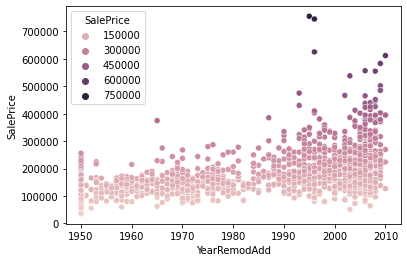

In [14]:
sns.scatterplot(data=data,x='YearRemodAdd',y='SalePrice',hue='SalePrice')

In [15]:
diff=pd.DataFrame()
diff['Difference']=data['YearRemodAdd']-data['YearBuilt']

In [16]:
temp=data.copy()
temp['diff_btw_build_remodel']=diff

<Axes: xlabel='diff_btw_build_remodel', ylabel='SalePrice'>

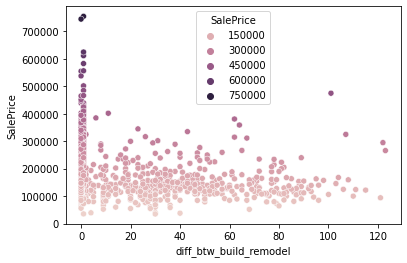

In [17]:
sns.scatterplot(data=temp,x='diff_btw_build_remodel',y='SalePrice',hue='SalePrice')

<Axes: xlabel='OverallQual', ylabel='diff_btw_build_remodel'>

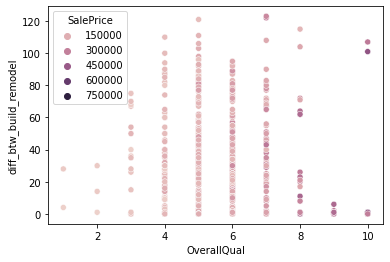

In [18]:
sns.scatterplot(data=temp,y='diff_btw_build_remodel',x='OverallQual',hue='SalePrice')

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

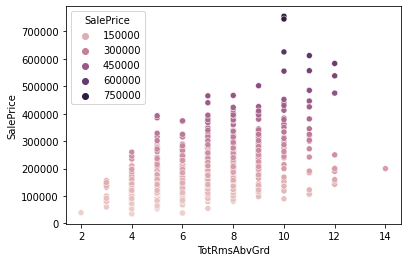

In [19]:
sns.scatterplot(data=temp,y='SalePrice',x='TotRmsAbvGrd',hue='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

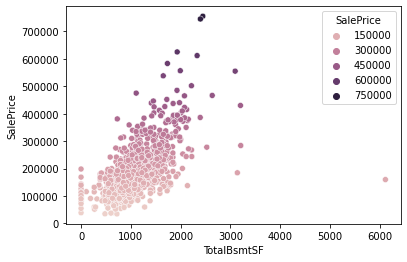

In [20]:
sns.scatterplot(data=data,y='SalePrice',x='TotalBsmtSF',hue='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

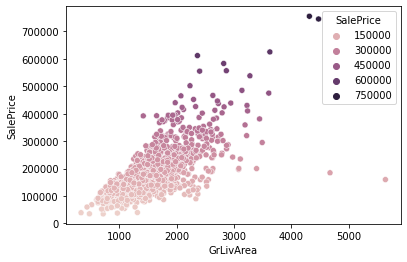

In [21]:
sns.scatterplot(data=data,y='SalePrice',x='GrLivArea',hue='SalePrice')

<Axes: xlabel='GarageArea', ylabel='GarageCars'>

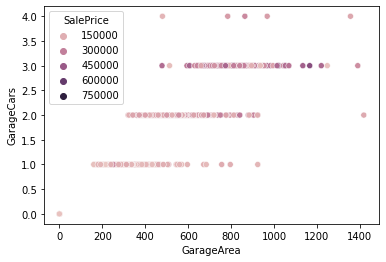

In [22]:
sns.scatterplot(data=data,x='GarageArea',y='GarageCars',hue='SalePrice')

<Axes: xlabel='1stFlrSF', ylabel='TotalBsmtSF'>

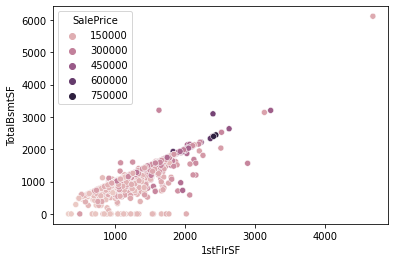

In [23]:
sns.scatterplot(data=data,x='1stFlrSF',y='TotalBsmtSF',hue='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='FullBath'>

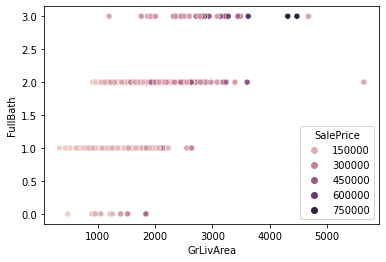

In [24]:
sns.scatterplot(data=data,y='FullBath',x='GrLivArea',hue='SalePrice')

## Insights
1. New Buildings have a greater Sales price
2. The new building which are remodeled are expensive as compared to old remodeled houses.
3. But, the old houses which are remodeled and have a better overall quality are expensive
4. Garage area or the number of cars that can fit in a garage is also affecting the sales price.But, houses with very big Garage area are not very expensive. This means people prefer houses which have a medium area parking which can fit 2-3 cars.
5. The ground floor area and basement area is mostly the same. The houses which have a smaller basement are cheaper.
6. Homes with the largest number of bathrooms and also over in an area have higher prices.
7. There is a trend seen after 1950 (approx), new houses are remodeled immediately

## Detecting Outliers Using Z scores

In [25]:
from scipy import stats
for i in data.columns:
  z = np.abs(stats.zscore(data[i]))
  print('Outliers for',i)
  print(np.where(z > 4))
  a=np.where(z > 4)
  data=data.drop(a[0],axis=0)
# Detecting and deleting outliers


Outliers for OverallQual
(array([], dtype=int64),)
Outliers for YearBuilt
(array([], dtype=int64),)
Outliers for YearRemodAdd
(array([], dtype=int64),)
Outliers for TotalBsmtSF
(array([ 332,  440,  496,  523, 1298]),)
Outliers for 1stFlrSF
(array([1020, 1368]),)
Outliers for GrLivArea
(array([ 185,  687, 1164, 1177]),)
Outliers for FullBath
(array([], dtype=int64),)
Outliers for TotRmsAbvGrd
(array([630]),)
Outliers for GarageCars
(array([], dtype=int64),)
Outliers for GarageArea
(array([ 576, 1180]),)
Outliers for SalePrice
(array([ 178,  683,  761,  795,  890, 1037, 1159, 1170]),)
Outliers for ExterQual_TA
(array([], dtype=int64),)
Outliers for BsmtQual_Ex
(array([], dtype=int64),)
Outliers for KitchenQual_Ex
(array([], dtype=int64),)
Outliers for KitchenQual_TA
(array([], dtype=int64),)


In [26]:
data.isna().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
SalePrice         0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
dtype: int64

In [27]:
data.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
SalePrice         0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
dtype: int64

## To improve model performance let us normalise the data 


In [28]:
for i in data.columns:
  data.rename(columns={'i ':'i'},inplace=True)

In [29]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [30]:
tp=data.drop('SalePrice',axis=1)
data_norm= norm_func(tp)
data_norm['SalePrice']=data['SalePrice']

In [31]:
data_norm

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,SalePrice
0,0.666667,0.949275,0.883333,0.325104,0.203588,0.332207,0.666667,0.500000,0.50,0.394245,0.0,0.0,0.0,0.0,208500
1,0.555556,0.753623,0.433333,0.479301,0.361934,0.224046,0.666667,0.333333,0.50,0.330935,1.0,0.0,0.0,1.0,181500
2,0.666667,0.934783,0.866667,0.349411,0.228549,0.350555,0.666667,0.333333,0.50,0.437410,0.0,0.0,0.0,0.0,223500
3,0.666667,0.311594,0.333333,0.287125,0.244540,0.333897,0.333333,0.416667,0.75,0.461871,1.0,0.0,0.0,0.0,140000
4,0.777778,0.927536,0.833333,0.434865,0.316303,0.450024,0.666667,0.583333,0.75,0.601439,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.920290,0.833333,0.361945,0.241420,0.316997,0.666667,0.416667,0.50,0.330935,1.0,0.0,0.0,1.0,175000
1456,0.555556,0.768116,0.633333,0.585644,0.678237,0.419845,0.666667,0.416667,0.50,0.359712,1.0,0.0,0.0,1.0,210000
1457,0.666667,0.500000,0.933333,0.437524,0.333073,0.484307,0.666667,0.583333,0.25,0.181295,0.0,0.0,0.0,0.0,266500
1458,0.444444,0.565217,0.766667,0.409419,0.290172,0.179623,0.333333,0.250000,0.25,0.172662,1.0,0.0,0.0,0.0,142125


In [34]:
from sklearn.model_selection import train_test_split
x= data_norm.drop(['SalePrice'],axis=1)
y= data_norm['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## Model Building 
### ANN- Artifical Neural Network

In [45]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [51]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.1
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [52]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [60]:
history=model.fit(x_train,y_train,epochs=100, 
    batch_size=64,
    validation_split=0.2)


Epoch 1/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0384 - mean_squared_logarithmic_error: 0.0384 - val_loss: 0.0252 - val_mean_squared_logarithmic_error: 0.0232
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0372 - mean_squared_logarithmic_error: 0.0366 - val_loss: 0.0250 - val_mean_squared_logarithmic_error: 0.0231
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0377 - mean_squared_logarithmic_error: 0.0377 - val_loss: 0.0301 - val_mean_squared_logarithmic_error: 0.0282
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0373 - mean_squared_logarithmic_error: 0.0374 - val_loss: 0.0286 - val_mean_squared_logarithmic_error: 0.0267
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0368 - mean_squared_logarithmic_error: 0.0366 - val_loss: 0.0247 - val_mean_squared_logarithmic_error: 0.0228
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - lo

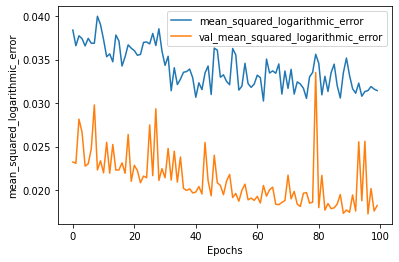

In [61]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

## Prediction

In [78]:
test=pd.read_csv('test (1).csv')
ids = test.pop('Id')

In [79]:
for i in test.columns:
  if(test[i].dtypes==object):
    test=pd.get_dummies(test,columns=[i])
test.rename(columns={'1stFlrSF':'First_FlrSF'},inplace=True)

In [80]:
test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

In [81]:

test= norm_func(test)


In [82]:
pd.set_option('Display.max_columns',500)

In [83]:
test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,First_FlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType

In [84]:
test_1= test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       'First_FlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'ExterQual_TA', 'BsmtQual_Ex',
       'KitchenQual_Ex', 'KitchenQual_TA']]

In [87]:
ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [88]:
final_predict=model.predict(test_1)


46/46 [==============================] - 0s 3ms/step


In [94]:
output = pd.DataFrame()
output['ID']=ids
output['SalePrice']=final_predict

In [93]:
output

,ID,SalePrice
0,1461,95094.609375
1,1462,125977.906250
2,1463,137494.984375
3,1464,153663.000000
4,1465,168203.546875
...,...,...
1454,2915,78799.640625
1455,2916,85804.359375
1456,2917,119367.593750
1457,2918,101695.382812


## Conclusion
* The Above model runs on 0.0314 as mean_squared_logarithmic_error
* The steps followed were
    1. EDA- Data cleaning by removing outliers and considering only those independent variables which have high positive and high negative correlation
    2. Visualisation- Considering teh relationships between dependent and indepnedent variable. Ploting the values to gain insights 
    3. Feature Engineering- Converting categorical columns into dummy variables and applying normalisation to the data set. Spliting the data into train and test data.
    4. Model Building- We have used Linear regression analysis using Artifical Neural networks
    5. Predicting The test value- After attaining low mean squared log error we predicted the values for test data  